In [4]:
#检测库是否安装完成
from datasets import load_dataset
import jieba
import pandas as pd
from tqdm import tqdm

print("所有库都成功导入！")

所有库都成功导入！


In [5]:
#因为无法读取网站数据，手动下载
from datasets import load_dataset
import os

# 确保文件存在
data_path = "D:/人民日报年份数据/1950.jsonl.gz"
if not os.path.exists(data_path):
    raise FileNotFoundError(f"请先下载 {data_path} 到本地！")

# 从本地 JSONL 加载
dataset = load_dataset("json", data_files=data_path, split="train")

print(f"成功加载 {len(dataset)} 篇文章")
print("示例：", dataset[0]["text"][:200])

Generating train split: 0 examples [00:00, ? examples/s]

成功加载 20008 篇文章
示例：     全国展开新年拥军运动
    中南区各地普设拥军运动组织         
    新疆省各族人民掀起劳军热潮
    首都分区开群众大会慰劳军属
    【新华社汉口三十一日电】中南区各地展开新年拥军运动。武汉市已于二十八日成立武汉市各界人民拥军委员会，由市工商联合会筹备会主任陈经畬为主任委员，市总工会赵敏等四人为副主任委员。该会决定以一九五○年一月三日至十日为拥军运动周，号召全市党政机


In [8]:
# ============= 配置 =============
YEAR = 1950
DATA_PATH = f"D:/人民日报年份数据/1950.jsonl.gz"         
MODEL_DIR = "models"
OUTPUT_MODEL = os.path.join(MODEL_DIR, f"{YEAR}.model")
os.makedirs(MODEL_DIR, exist_ok=True)


In [14]:
# 添加关键社会历史词汇（防止被错误切分）
SOCIAL_TERMS = [
    "拥军优属", "工农兵", "地主", "资本家", "妇女", "少数民族", 
    "劳动模范", "人民公社", "合作社", "土改", "翻身", "阶级",
    "帝国主义", "苏联", "斯大林", "新民主主义", "解放区"
]    
for term in SOCIAL_TERMS:
    jieba.add_word(term, freq=2000, tag='n')


Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\ADMINI~1\AppData\Local\Temp\jieba.cache
Loading model cost 0.613 seconds.
Prefix dict has been built successfully.


In [15]:
# 数据处理 加载数据 =============
print(f"正在加载1950年《人民日报》数据...")
dataset = load_dataset("json", data_files=DATA_PATH, split="train")
print(f"共加载 {len(dataset)} 篇文章")

正在加载1950年《人民日报》数据...
共加载 20008 篇文章


In [13]:
import numpy as np

In [32]:
#转移文件至同一文件夹
import os
import shutil

# 配置路径（请确认路径正确！）
SOURCE_DIR = r"C:\Users\Administrator\Downloads"
TARGET_DIR = r"D:\人民日报年份数据"

os.makedirs(TARGET_DIR, exist_ok=True)

moved_count = 0
for year in range(1953, 2020):
    filename = f"{year}.jsonl.gz"
    src_path = os.path.join(SOURCE_DIR, filename)
    dst_path = os.path.join(TARGET_DIR, filename)
    
    if os.path.exists(src_path):
        shutil.move(src_path, dst_path)
        print(f"✅ 移动: {filename}")
        moved_count += 1
    else:
        print(f"跳过: {filename}（不存在）")

print("共成功移动 {moved_count} 个文件到 {TARGET_DIR}")

✅ 移动: 1953.jsonl.gz
✅ 移动: 1954.jsonl.gz
✅ 移动: 1955.jsonl.gz
✅ 移动: 1956.jsonl.gz
✅ 移动: 1957.jsonl.gz
✅ 移动: 1958.jsonl.gz
✅ 移动: 1959.jsonl.gz
✅ 移动: 1960.jsonl.gz
✅ 移动: 1961.jsonl.gz
✅ 移动: 1962.jsonl.gz
✅ 移动: 1963.jsonl.gz
✅ 移动: 1964.jsonl.gz
✅ 移动: 1965.jsonl.gz
✅ 移动: 1966.jsonl.gz
✅ 移动: 1967.jsonl.gz
✅ 移动: 1968.jsonl.gz
✅ 移动: 1969.jsonl.gz
✅ 移动: 1970.jsonl.gz
✅ 移动: 1971.jsonl.gz
✅ 移动: 1972.jsonl.gz
✅ 移动: 1973.jsonl.gz
✅ 移动: 1974.jsonl.gz
✅ 移动: 1975.jsonl.gz
✅ 移动: 1976.jsonl.gz
✅ 移动: 1977.jsonl.gz
✅ 移动: 1978.jsonl.gz
✅ 移动: 1979.jsonl.gz
✅ 移动: 1980.jsonl.gz
✅ 移动: 1981.jsonl.gz
✅ 移动: 1982.jsonl.gz
✅ 移动: 1983.jsonl.gz
✅ 移动: 1984.jsonl.gz
✅ 移动: 1985.jsonl.gz
✅ 移动: 1986.jsonl.gz
✅ 移动: 1987.jsonl.gz
✅ 移动: 1988.jsonl.gz
✅ 移动: 1989.jsonl.gz
✅ 移动: 1990.jsonl.gz
✅ 移动: 1991.jsonl.gz
✅ 移动: 1992.jsonl.gz
✅ 移动: 1993.jsonl.gz
✅ 移动: 1994.jsonl.gz
✅ 移动: 1995.jsonl.gz
✅ 移动: 1996.jsonl.gz
✅ 移动: 1997.jsonl.gz
✅ 移动: 1998.jsonl.gz
✅ 移动: 1999.jsonl.gz
✅ 移动: 2000.jsonl.gz
✅ 移动: 2001.jsonl.gz
✅ 移动: 2002.jsonl.gz


In [92]:
#训练skip gram年度模型（1950–2019）
# train_yearly_sg300w3.py
"""
严格复现论文方法：训练 1950–2019 年《人民日报》年度词向量
- 模型：Skip-gram (sg=1)
- 维度：300
- 窗口：3
- min_count：10
- 输出目录：models_yearly_sg300w3/
"""

import os
import re
import jieba
from tqdm import tqdm
from datasets import load_dataset
from gensim.models import Word2Vec

# ===== 配置 =====
DATA_ROOT = r"D:/人民日报年份数据"
MODEL_DIR = "models_yearly_sg300w3"
YEARS = range(1950, 2020)  
os.makedirs(MODEL_DIR, exist_ok=True)

# 强化关键词表：覆盖性别、特质、历史政治术语（尤其文革负面词）
KEY_TERMS = [
    # 性别群体
    "女人", "女性", "她", "妻子", "姑娘", "妇女", "母亲", "女儿",
    "男人", "男性", "他", "丈夫", "小伙子", "干部", "父亲", "儿子",
    # 人格特质（正/负）
    "天真", "活泼", "温柔", "可爱", "文静", "善良", "优雅", "淳朴", "懂事",
    "黑心", "无耻", "下流", "滑稽", "颓废", "污秽", "反动", "臭", "坏",
    # 文革核心政治标签
    "走资派", "牛鬼蛇神", "黑帮", "黑线", "黑手", "地富反坏右", "右派",
    "资产阶级", "修正主义", "封资修", "大毒草", "叛徒", "特务", "工贼",
    # 其他历史术语
    "工农兵", "劳动模范", "人民公社", "合作社", "土改", "翻身", "阶级",
    "帝国主义", "苏联", "斯大林", "新民主主义", "解放区",
    "改革开放", "市场经济", "下岗", "农民工", "白领", "富人",
    "四化", "总路线", "大跃进", "文革", "红卫兵", "知青"
]

for term in KEY_TERMS:
    jieba.add_word(term, freq=10000, tag='n')  

def clean_and_tokenize(text):
    text = re.sub(r"[^\u4e00-\u9fa5a-zA-Z0-9。，！？；：\s]", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    if not text:
        return []
    sentences = re.split(r"[。！？\n]", text)
    tokenized = []
    for sent in sentences:
        sent = sent.strip()
        if len(sent) < 5:
            continue
        words = jieba.lcut(sent)
        words = [w.strip() for w in words if w.strip() and len(w) >= 1]
        if len(words) >= 3:
            tokenized.append(words)
    return tokenized

# ===== 主循环：逐年训练 =====
for year in YEARS:
    data_path = os.path.join(DATA_ROOT, f"{year}.jsonl.gz")
    if not os.path.exists(data_path):
        print(f"跳过 {year}：文件不存在")
        continue

    try:
        print(f"\n--- 训练 {year} 年模型（sg=1, dim=300, win=3）---")
        dataset = load_dataset("json", data_files=data_path, split="train")
        print(f"   加载 {len(dataset)} 篇文章")

        all_sentences = []
        for item in tqdm(dataset, desc="   分词", leave=False):
            all_sentences.extend(clean_and_tokenize(item["text"]))
        
        if not all_sentences:
            print(f"   无有效句子，跳过")
            continue

        print(f"   生成 {len(all_sentences)} 个句子")

        # 严格对齐论文参数
        model = Word2Vec(
            sentences=all_sentences,
            vector_size=300,
            window=3,
            min_count=10,
            sg=1,                 # Skip-gram
            workers=min(6, os.cpu_count()),
            epochs=10,
            seed=42
        )

        model.save(os.path.join(MODEL_DIR, f"{year}.model"))
        print(f"   模型已保存至 {MODEL_DIR}/{year}.model")

    except Exception as e:
        print(f"    {year} 年出错: {e}")
        continue

print(f"\n全部完成！模型保存在 '{MODEL_DIR}' 文件夹中。")


--- 训练 1950 年模型（sg=1, dim=300, win=3）---
   加载 20008 篇文章


   生成 429612 个句子
   模型已保存至 models_yearly_sg300w3/1950.model

--- 训练 1951 年模型（sg=1, dim=300, win=3）---
   加载 13762 篇文章


   生成 360115 个句子
   模型已保存至 models_yearly_sg300w3/1951.model

--- 训练 1952 年模型（sg=1, dim=300, win=3）---
   加载 13385 篇文章


   生成 360144 个句子
   模型已保存至 models_yearly_sg300w3/1952.model

--- 训练 1953 年模型（sg=1, dim=300, win=3）---
   加载 12795 篇文章


   生成 356353 个句子
   模型已保存至 models_yearly_sg300w3/1953.model

--- 训练 1954 年模型（sg=1, dim=300, win=3）---
   加载 13973 篇文章


   生成 341089 个句子
   模型已保存至 models_yearly_sg300w3/1954.model

--- 训练 1955 年模型（sg=1, dim=300, win=3）---
   加载 15613 篇文章


   生成 371831 个句子
   模型已保存至 models_yearly_sg300w3/1955.model

--- 训练 1956 年模型（sg=1, dim=300, win=3）---
   加载 23721 篇文章


   生成 452385 个句子
   模型已保存至 models_yearly_sg300w3/1956.model

--- 训练 1957 年模型（sg=1, dim=300, win=3）---
   加载 25402 篇文章


   生成 576108 个句子
   模型已保存至 models_yearly_sg300w3/1957.model

--- 训练 1958 年模型（sg=1, dim=300, win=3）---
   加载 28065 篇文章


   生成 567680 个句子
   模型已保存至 models_yearly_sg300w3/1958.model

--- 训练 1959 年模型（sg=1, dim=300, win=3）---
   加载 22854 篇文章


   生成 577104 个句子
   模型已保存至 models_yearly_sg300w3/1959.model

--- 训练 1960 年模型（sg=1, dim=300, win=3）---
   加载 23449 篇文章


   生成 578661 个句子
   模型已保存至 models_yearly_sg300w3/1960.model

--- 训练 1961 年模型（sg=1, dim=300, win=3）---
   加载 21993 篇文章


   生成 450573 个句子
   模型已保存至 models_yearly_sg300w3/1961.model

--- 训练 1962 年模型（sg=1, dim=300, win=3）---
   加载 17349 篇文章


   生成 337450 个句子
   模型已保存至 models_yearly_sg300w3/1962.model

--- 训练 1963 年模型（sg=1, dim=300, win=3）---
   加载 15204 篇文章


   生成 334969 个句子
   模型已保存至 models_yearly_sg300w3/1963.model

--- 训练 1964 年模型（sg=1, dim=300, win=3）---
   加载 16636 篇文章


   生成 380258 个句子
   模型已保存至 models_yearly_sg300w3/1964.model

--- 训练 1965 年模型（sg=1, dim=300, win=3）---
   加载 16244 篇文章


   生成 376587 个句子
   模型已保存至 models_yearly_sg300w3/1965.model

--- 训练 1966 年模型（sg=1, dim=300, win=3）---
   加载 12197 篇文章


   生成 319323 个句子
   模型已保存至 models_yearly_sg300w3/1966.model

--- 训练 1967 年模型（sg=1, dim=300, win=3）---
   加载 9290 篇文章


   生成 245815 个句子
   模型已保存至 models_yearly_sg300w3/1967.model

--- 训练 1968 年模型（sg=1, dim=300, win=3）---
   加载 9219 篇文章


   生成 235788 个句子
   模型已保存至 models_yearly_sg300w3/1968.model

--- 训练 1969 年模型（sg=1, dim=300, win=3）---
   加载 10129 篇文章


   生成 244580 个句子
   模型已保存至 models_yearly_sg300w3/1969.model

--- 训练 1970 年模型（sg=1, dim=300, win=3）---
   加载 10572 篇文章


   生成 244837 个句子
   模型已保存至 models_yearly_sg300w3/1970.model

--- 训练 1971 年模型（sg=1, dim=300, win=3）---
   加载 10425 篇文章


   生成 216741 个句子
   模型已保存至 models_yearly_sg300w3/1971.model

--- 训练 1972 年模型（sg=1, dim=300, win=3）---
   加载 14336 篇文章


   生成 248474 个句子
   模型已保存至 models_yearly_sg300w3/1972.model

--- 训练 1973 年模型（sg=1, dim=300, win=3）---
   加载 14850 篇文章


   生成 264107 个句子
   模型已保存至 models_yearly_sg300w3/1973.model

--- 训练 1974 年模型（sg=1, dim=300, win=3）---
   加载 12838 篇文章


   生成 268047 个句子
   模型已保存至 models_yearly_sg300w3/1974.model

--- 训练 1975 年模型（sg=1, dim=300, win=3）---
   加载 13365 篇文章


   生成 255920 个句子
   模型已保存至 models_yearly_sg300w3/1975.model

--- 训练 1976 年模型（sg=1, dim=300, win=3）---
   加载 12266 篇文章


   生成 254498 个句子
   模型已保存至 models_yearly_sg300w3/1976.model

--- 训练 1977 年模型（sg=1, dim=300, win=3）---
   加载 12720 篇文章


   生成 260706 个句子
   模型已保存至 models_yearly_sg300w3/1977.model

--- 训练 1978 年模型（sg=1, dim=300, win=3）---
   加载 13436 篇文章


   生成 299777 个句子
   模型已保存至 models_yearly_sg300w3/1978.model

--- 训练 1979 年模型（sg=1, dim=300, win=3）---
   加载 17554 篇文章


   生成 355520 个句子
   模型已保存至 models_yearly_sg300w3/1979.model

--- 训练 1980 年模型（sg=1, dim=300, win=3）---
   加载 27246 篇文章


   生成 434489 个句子
   模型已保存至 models_yearly_sg300w3/1980.model

--- 训练 1981 年模型（sg=1, dim=300, win=3）---
   加载 28382 篇文章


   生成 442437 个句子
   模型已保存至 models_yearly_sg300w3/1981.model

--- 训练 1982 年模型（sg=1, dim=300, win=3）---
   加载 28353 篇文章


   生成 438421 个句子
   模型已保存至 models_yearly_sg300w3/1982.model

--- 训练 1983 年模型（sg=1, dim=300, win=3）---
   加载 31156 篇文章


   生成 418862 个句子
   模型已保存至 models_yearly_sg300w3/1983.model

--- 训练 1984 年模型（sg=1, dim=300, win=3）---
   加载 31978 篇文章


   生成 426600 个句子
   模型已保存至 models_yearly_sg300w3/1984.model

--- 训练 1985 年模型（sg=1, dim=300, win=3）---
   加载 34351 篇文章


   生成 453443 个句子
   模型已保存至 models_yearly_sg300w3/1985.model

--- 训练 1986 年模型（sg=1, dim=300, win=3）---
   加载 33579 篇文章


   生成 454882 个句子
   模型已保存至 models_yearly_sg300w3/1986.model

--- 训练 1987 年模型（sg=1, dim=300, win=3）---
   加载 32703 篇文章


   生成 452400 个句子
   模型已保存至 models_yearly_sg300w3/1987.model

--- 训练 1988 年模型（sg=1, dim=300, win=3）---
   加载 33551 篇文章


   生成 453371 个句子
   模型已保存至 models_yearly_sg300w3/1988.model

--- 训练 1989 年模型（sg=1, dim=300, win=3）---
   加载 30049 篇文章


   生成 430662 个句子
   模型已保存至 models_yearly_sg300w3/1989.model

--- 训练 1990 年模型（sg=1, dim=300, win=3）---
   加载 31719 篇文章


   生成 442357 个句子
   模型已保存至 models_yearly_sg300w3/1990.model

--- 训练 1991 年模型（sg=1, dim=300, win=3）---
   加载 33827 篇文章


   生成 414241 个句子
   模型已保存至 models_yearly_sg300w3/1991.model

--- 训练 1992 年模型（sg=1, dim=300, win=3）---
   加载 37372 篇文章


   生成 414581 个句子
   模型已保存至 models_yearly_sg300w3/1992.model

--- 训练 1993 年模型（sg=1, dim=300, win=3）---
   加载 36514 篇文章


   生成 411977 个句子
   模型已保存至 models_yearly_sg300w3/1993.model

--- 训练 1994 年模型（sg=1, dim=300, win=3）---
   加载 34004 篇文章


   生成 447589 个句子
   模型已保存至 models_yearly_sg300w3/1994.model

--- 训练 1995 年模型（sg=1, dim=300, win=3）---
   加载 37633 篇文章


   生成 514479 个句子
   模型已保存至 models_yearly_sg300w3/1995.model

--- 训练 1996 年模型（sg=1, dim=300, win=3）---
   加载 37139 篇文章


   生成 503740 个句子
   模型已保存至 models_yearly_sg300w3/1996.model

--- 训练 1997 年模型（sg=1, dim=300, win=3）---
   加载 34327 篇文章


   生成 513020 个句子
   模型已保存至 models_yearly_sg300w3/1997.model

--- 训练 1998 年模型（sg=1, dim=300, win=3）---
   加载 33706 篇文章


   生成 504872 个句子
   模型已保存至 models_yearly_sg300w3/1998.model

--- 训练 1999 年模型（sg=1, dim=300, win=3）---
   加载 34830 篇文章


   生成 494134 个句子
   模型已保存至 models_yearly_sg300w3/1999.model

--- 训练 2000 年模型（sg=1, dim=300, win=3）---
   加载 34716 篇文章


   生成 495343 个句子
   模型已保存至 models_yearly_sg300w3/2000.model

--- 训练 2001 年模型（sg=1, dim=300, win=3）---
   加载 35627 篇文章


   生成 491777 个句子
   模型已保存至 models_yearly_sg300w3/2001.model

--- 训练 2002 年模型（sg=1, dim=300, win=3）---
   加载 34811 篇文章


   生成 489480 个句子
   模型已保存至 models_yearly_sg300w3/2002.model

--- 训练 2003 年模型（sg=1, dim=300, win=3）---
   加载 43227 篇文章


   生成 615329 个句子
   模型已保存至 models_yearly_sg300w3/2003.model

--- 训练 2004 年模型（sg=1, dim=300, win=3）---
   加载 50736 篇文章


   生成 654806 个句子
   模型已保存至 models_yearly_sg300w3/2004.model

--- 训练 2005 年模型（sg=1, dim=300, win=3）---
   加载 39706 篇文章


   生成 573701 个句子
   模型已保存至 models_yearly_sg300w3/2005.model

--- 训练 2006 年模型（sg=1, dim=300, win=3）---
   加载 40409 篇文章


   生成 613457 个句子
   模型已保存至 models_yearly_sg300w3/2006.model

--- 训练 2007 年模型（sg=1, dim=300, win=3）---
   加载 44610 篇文章


   生成 690410 个句子
   模型已保存至 models_yearly_sg300w3/2007.model

--- 训练 2008 年模型（sg=1, dim=300, win=3）---
   加载 33458 篇文章


   生成 571761 个句子
   模型已保存至 models_yearly_sg300w3/2008.model

--- 训练 2009 年模型（sg=1, dim=300, win=3）---
   加载 26912 篇文章


   生成 495825 个句子
   模型已保存至 models_yearly_sg300w3/2009.model

--- 训练 2010 年模型（sg=1, dim=300, win=3）---
   加载 27935 篇文章


   生成 490497 个句子
   模型已保存至 models_yearly_sg300w3/2010.model

--- 训练 2011 年模型（sg=1, dim=300, win=3）---
   加载 27025 篇文章


   生成 537332 个句子
   模型已保存至 models_yearly_sg300w3/2011.model

--- 训练 2012 年模型（sg=1, dim=300, win=3）---
   加载 26967 篇文章


   生成 548523 个句子
   模型已保存至 models_yearly_sg300w3/2012.model

--- 训练 2013 年模型（sg=1, dim=300, win=3）---
   加载 28815 篇文章


   生成 569566 个句子
   模型已保存至 models_yearly_sg300w3/2013.model

--- 训练 2014 年模型（sg=1, dim=300, win=3）---
   加载 29506 篇文章


   生成 596962 个句子
   模型已保存至 models_yearly_sg300w3/2014.model

--- 训练 2015 年模型（sg=1, dim=300, win=3）---
   加载 29313 篇文章


   生成 625362 个句子
   模型已保存至 models_yearly_sg300w3/2015.model

--- 训练 2016 年模型（sg=1, dim=300, win=3）---
   加载 29427 篇文章


   生成 653162 个句子
   模型已保存至 models_yearly_sg300w3/2016.model

--- 训练 2017 年模型（sg=1, dim=300, win=3）---
   加载 27958 篇文章


   生成 624568 个句子
   模型已保存至 models_yearly_sg300w3/2017.model

--- 训练 2018 年模型（sg=1, dim=300, win=3）---
   加载 28108 篇文章


   生成 622602 个句子
   模型已保存至 models_yearly_sg300w3/2018.model

--- 训练 2019 年模型（sg=1, dim=300, win=3）---
   加载 26168 篇文章


   生成 788130 个句子
   模型已保存至 models_yearly_sg300w3/2019.model

全部完成！模型保存在 'models_yearly_sg300w3' 文件夹中。


In [5]:
#训练skip gram十年期模型（ 1950s–2010s）
# train_decade_sg300w3_and_table2.py
"""
1. 从原始数据构建 1950s–2010s 十年语料（1950–2019）
2. 用 Skip-gram (300d, win=3) 训练十年模型
3. 生成扩展版 Table 2（覆盖 1950s–2010s）
输出目录：models_decade_sg300w3/
"""

import os
import re
import jieba
import gzip
import json
from tqdm import tqdm
from gensim.models import Word2Vec
import pandas as pd
import numpy as np

# ===== 配置 =====
DATA_ROOT = r"D:/人民日报年份数据"
DECADE_MODEL_DIR = "models_decade_sg300w3" 
os.makedirs(DECADE_MODEL_DIR, exist_ok=True)

#  修改1：扩展为 1950s 到 2010s（共7个十年）
DECADES = {
    "1950s": list(range(1950, 1960)),
    "1960s": list(range(1960, 1970)),
    "1970s": list(range(1970, 1980)),
    "1980s": list(range(1980, 1990)),
    "1990s": list(range(1990, 2000)),
    "2000s": list(range(2000, 2010)),
    "2010s": list(range(2010, 2020))
}

# 复用关键词表（与年度训练完全一致）
KEY_TERMS = [
    "女人", "女性", "她", "妻子", "姑娘", "妇女", "母亲", "女儿",
    "男人", "男性", "他", "丈夫", "小伙子", "干部", "父亲", "儿子",
    "天真", "活泼", "温柔", "可爱", "文静", "善良", "优雅", "淳朴", "懂事",
    "黑心", "无耻", "下流", "滑稽", "颓废", "污秽", "反动", "臭", "坏",
    "走资派", "牛鬼蛇神", "黑帮", "黑线", "黑手", "地富反坏右", "右派",
    "资产阶级", "修正主义", "封资修", "大毒草", "叛徒", "特务", "工贼",
    "工农兵", "劳动模范", "人民公社", "合作社", "土改", "翻身", "阶级",
    "帝国主义", "苏联", "斯大林", "新民主主义", "解放区",
    "改革开放", "市场经济", "下岗", "农民工", "白领", "富人",
    "四化", "总路线", "大跃进", "文革", "红卫兵", "知青"
]

for term in KEY_TERMS:
    jieba.add_word(term, freq=10000, tag='n')

def clean_and_tokenize(text):
    text = re.sub(r"[^\u4e00-\u9fa5a-zA-Z0-9。，！？；：\s]", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    if not text:
        return []
    sentences = re.split(r"[。！？\n]", text)
    tokenized = []
    for sent in sentences:
        sent = sent.strip()
        if len(sent) < 5:
            continue
        words = jieba.lcut(sent)
        words = [w.strip() for w in words if w.strip() and len(w) >= 1]
        if len(words) >= 3:
            tokenized.append(words)
    return tokenized

# ===== 步骤1：训练十年模型（1950s–2010s）=====
for decade_name, years in DECADES.items():
    print(f"\n--- 构建并训练 {decade_name} 模型（sg=1, dim=300, win=3）---")
    all_sentences = []
    
    for year in tqdm(years, desc=f"  加载 {decade_name} 年份"):
        data_path = os.path.join(DATA_ROOT, f"{year}.jsonl.gz")
        if not os.path.exists(data_path):
            continue
        with gzip.open(data_path, 'rt', encoding='utf-8') as f:
            for line in f:
                try:
                    item = json.loads(line)
                    all_sentences.extend(clean_and_tokenize(item["text"]))
                except:
                    continue
    
    print(f"   总计 {len(all_sentences)} 个句子")
    if not all_sentences:
        print(f"   {decade_name} 无有效数据！")
        continue

    model = Word2Vec(
        sentences=all_sentences,
        vector_size=300,
        window=3,
        min_count=10,
        sg=1,          # Skip-gram
        workers=min(6, os.cpu_count()),
        epochs=10,
        seed=42
    )
    
    model.save(os.path.join(DECADE_MODEL_DIR, f"{decade_name}.model"))
    print(f"    {decade_name} 模型已保存至 {DECADE_MODEL_DIR}/")

# ===== 步骤2：生成扩展 Table 2（1950s–2010s）=====
TRAIT_FILE = r"C:/Users/Administrator/Desktop/数据复现数据/trait_cn.txt"
FEMALE_LABELS = ["女人", "女性", "她", "妻子", "姑娘", "妇女"]

df_traits = pd.read_csv(TRAIT_FILE, sep=r"\s+", header=None, names=["Word", "Valence"], engine="python")
TRAIT_VALENCE = dict(zip(df_traits["Word"], df_traits["Valence"]))
PERSONALITY_TRAITS = [str(w).strip() for w in df_traits["Word"].tolist()]
BLACKLIST = {"好色", "弱智", "猥琐"}
PERSONALITY_TRAITS = [w for w in PERSONALITY_TRAITS if w not in BLACKLIST]

def compute_mac_for_group(model, labels, trait):
    sims = []
    for label in labels:
        if label in model.wv and trait in model.wv:
            sims.append(model.wv.similarity(label, trait))
    return np.mean(sims) if sims else -np.inf

def get_top_k_traits_by_mac(model, labels, traits, k=10):
    mac_scores = []
    for trait in traits:
        mac = compute_mac_for_group(model, labels, trait)
        if mac > -np.inf:
            mac_scores.append((trait, mac))
    mac_scores.sort(key=lambda x: x[1], reverse=True)
    return [trait for trait, _ in mac_scores[:k]]

# 修改2：定义完整的十年列表用于分析
ALL_DECADES = ["1950s", "1960s", "1970s", "1980s", "1990s", "2000s", "2010s"]

table_data = {"Trait": []}
valences = {}

for decade in ALL_DECADES:
    model_path = os.path.join(DECADE_MODEL_DIR, f"{decade}.model")
    if not os.path.exists(model_path):
        print(f" 跳过 {decade}：模型不存在")
        table_data[decade] = [""] * 10
        valences[decade] = 0.0
        continue
        
    model = Word2Vec.load(model_path)
    avail_labels = [w for w in FEMALE_LABELS if w in model.wv]
    if not avail_labels:
        print(f" {decade}：无有效女性标签")
        table_data[decade] = [""] * 10
        valences[decade] = 0.0
        continue
        
    top_traits = get_top_k_traits_by_mac(model, avail_labels, PERSONALITY_TRAITS, k=10)
    table_data[decade] = top_traits
    vals = [TRAIT_VALENCE.get(t, 0) for t in top_traits if t in TRAIT_VALENCE]
    valences[decade] = np.mean(vals) if vals else 0.0

# 对齐行数（确保表格整齐）
max_len = max(len(v) for v in table_data.values())
for key in table_data:
    while len(table_data[key]) < max_len:
        table_data[key].append("")

# 打印 & 保存
df_table = pd.DataFrame(table_data)
print("="*140)
print("Table 2: Top 10 traits most strongly associated with women (1950s–2010s)")
print("="*140)

# 动态生成表头
header = "Trait".ljust(12)
for d in ALL_DECADES:
    header += f"{d} ({valences[d]:+.2f})".ljust(18)
print(header)
print("-"*140)

# 打印每一行
for i in range(len(df_table)):
    row = df_table.iloc[i]["Trait"].ljust(12)
    for d in ALL_DECADES:
        row += str(df_table.iloc[i][d]).ljust(18)
    print(row)

output_file = "table2_reproduction_sg300w3_1950s-2010s.csv"
df_table.to_csv(output_file, index=False, encoding="utf-8-sig")
print(f"\n表格已保存至: {output_file}")


--- 构建并训练 1950s 模型（sg=1, dim=300, win=3）---


  加载 1950s 年份: 100%|██████████| 10/10 [12:08<00:00, 72.88s/it]


   总计 4392418 个句子
    1950s 模型已保存至 models_decade_sg300w3/

--- 构建并训练 1960s 模型（sg=1, dim=300, win=3）---


  加载 1960s 年份: 100%|██████████| 10/10 [11:36<00:00, 69.63s/it]


   总计 3504002 个句子
    1960s 模型已保存至 models_decade_sg300w3/

--- 构建并训练 1970s 模型（sg=1, dim=300, win=3）---


  加载 1970s 年份: 100%|██████████| 10/10 [09:20<00:00, 56.07s/it]


   总计 2668622 个句子
    1970s 模型已保存至 models_decade_sg300w3/

--- 构建并训练 1980s 模型（sg=1, dim=300, win=3）---


  加载 1980s 年份: 100%|██████████| 10/10 [14:33<00:00, 87.39s/it]


   总计 4405559 个句子
    1980s 模型已保存至 models_decade_sg300w3/

--- 构建并训练 1990s 模型（sg=1, dim=300, win=3）---


  加载 1990s 年份: 100%|██████████| 10/10 [17:13<00:00, 103.40s/it]


   总计 4660985 个句子
    1990s 模型已保存至 models_decade_sg300w3/

--- 构建并训练 2000s 模型（sg=1, dim=300, win=3）---


  加载 2000s 年份: 100%|██████████| 10/10 [28:59<00:00, 173.94s/it]


   总计 5691886 个句子
    2000s 模型已保存至 models_decade_sg300w3/

--- 构建并训练 2010s 模型（sg=1, dim=300, win=3）---


  加载 2010s 年份: 100%|██████████| 10/10 [30:31<00:00, 183.13s/it]


   总计 6056702 个句子
    2010s 模型已保存至 models_decade_sg300w3/
Table 2: Top 10 traits most strongly associated with women (1950s–2010s)
Trait       1950s (+0.93)     1960s (+0.73)     1970s (+0.60)     1980s (+0.36)     1990s (+0.35)     2000s (+0.23)     2010s (+0.32)     
--------------------------------------------------------------------------------------------------------------------------------------------
            天真无邪              天真无邪              淘气                天真无邪              贤淑                怕羞                贤淑                
            怕羞                羞涩                文静                贤淑                天真无邪              贤淑                天真无邪              
            厚道                文静                健谈                伶俐                害羞                白痴                娇纵                
            孝顺                娇生惯养              娇生惯养              纯情                文静                羞涩                淘气                
            懂事                懂事 

In [2]:
#读取特质词库

import os
import pandas as pd

TRAIT_FILE = r"C:/Users/Administrator/Desktop/数据复现数据/trait_cn.txt"

if not os.path.exists(TRAIT_FILE):
    raise FileNotFoundError(f"文件不存在: {TRAIT_FILE}")

print("正在加载 trait_cn.txt（空格分隔，无表头）...")

# 正确读取：无表头，空格分隔（支持多个空格）
df_traits = pd.read_csv(
    TRAIT_FILE,
    sep=r"\s+",          # 正则：一个或多个空白字符（空格/制表符）
    header=None,         # 没有列名
    encoding="utf-8",
    engine="python",     # 使用 Python 引擎以支持正则 sep
    names=["Word", "Valence_Mean"]  # 手动指定列名
)

# 清理可能的 NaN（极少数情况）
df_traits = df_traits.dropna()

# 构建字典
TRAIT_VALENCE = dict(zip(df_traits["Word"].astype(str).str.strip(), 
                         df_traits["Valence_Mean"].astype(float)))

PERSONALITY_TRAITS = set(TRAIT_VALENCE.keys())
print(f"成功加载 {len(PERSONALITY_TRAITS)} 个人格特质词")
print("示例:", list(TRAIT_VALENCE.items())[:5])

正在加载 trait_cn.txt（空格分隔，无表头）...
成功加载 465 个人格特质词
示例: [('阿谀奉承', -2.15), ('安分', 0.92), ('安静', 1.09), ('安祥', 1.53), ('肮脏', -2.32)]


In [6]:
#Analysis 1：性别效价不对称（Gender Valence Asymmetry） 
import os
import numpy as np
import pandas as pd
from gensim.models import Word2Vec

# ======================
# 配置（严格对齐论文）
# ======================
MODEL_DIR = "models_decade_sg300w3"
TRAIT_FILE = r"C:/Users/Administrator/Desktop/数据复现数据/trait_cn.txt"

DECADES = ["1950s", "1960s", "1970s", "1980s", "1990s", "2000s", "2010s"]

# 论文中的性别标签（Table 1 & Section "Selection and representation of social groups"）
# 使用多标签覆盖不同语境
FEMALE_LABELS = ["女人", "女性", "她", "妻子", "姑娘", "妇女"]
MALE_LABELS   = ["男人", "男性", "他", "丈夫", "小伙子", "男子"]

TOP_K_TRAITS = 10  # 论文用 Top 10 traits
MIN_LABELS = 1     # 至少1个标签存在即可（论文未要求全部存在）

# ======================
# 加载 trait_cn.txt（空格分隔，无 header）
# ======================
print("加载中文人格特质词典 (trait_cn.txt)...")
try:
    df_traits = pd.read_csv(
        TRAIT_FILE,
        sep=r"\s+",
        header=None,
        names=["Word", "Valence_Mean"],
        encoding="utf-8",
        engine="python"
    )
except Exception as e:
    raise RuntimeError(f"无法加载 trait_cn.txt: {e}")

# 构建词-效价映射
TRAIT_VALENCE = {}
for _, row in df_traits.iterrows():
    word = str(row["Word"]).strip()
    valence = float(row["Valence_Mean"])
    TRAIT_VALENCE[word] = valence

PERSONALITY_TRAITS = set(TRAIT_VALENCE.keys())
print(f"成功加载 {len(PERSONALITY_TRAITS)} 个人格特质词")

# ======================
# 工具函数：计算 MAC（Mean Average Cosine Similarity）
# ======================
def compute_mac(model, group_labels, trait_word):
    """计算群体标签与特质词的 MAC 分数"""
    sims = []
    for label in group_labels:
        if label in model.wv and trait_word in model.wv:
            sim = model.wv.similarity(label, trait_word)
            sims.append(sim)
    return np.mean(sims) if sims else -np.inf  # 不存在则返回极小值

def get_top_traits_by_mac(model, group_labels, top_k=10):
    """返回 MAC 最高的 top_k 个人格特质词"""
    mac_scores = []
    for trait in PERSONALITY_TRAITS:
        mac = compute_mac(model, group_labels, trait)
        if mac > -np.inf:
            mac_scores.append((trait, mac))
    
    # 按 MAC 降序排序，取 top_k
    mac_scores.sort(key=lambda x: x[1], reverse=True)
    top_traits = [trait for trait, _ in mac_scores[:top_k]]
    return top_traits

# ======================
# 主分析：复现 Analysis 1
# ======================
results = []

for decade in DECADES:
    model_path = os.path.join(MODEL_DIR, f"{decade}.model")
    if not os.path.exists(model_path):
        print(f"跳过 {decade}：模型不存在")
        continue
    
    try:
        model = Word2Vec.load(model_path)
    except Exception as e:
        print(f"跳过 {decade}：模型加载失败 - {e}")
        continue
    
    # 检查至少有一个标签存在
    female_available = [w for w in FEMALE_LABELS if w in model.wv]
    male_available   = [w for w in MALE_LABELS if w in model.wv]
    
    if not female_available or not male_available:
        print(f"跳过 {decade}：缺少性别标签（女: {len(female_available)}, 男: {len(male_available)}）")
        results.append({
            "Decade": decade,
            "Female_Valence": None,
            "Male_Valence": None,
            "Female_Top_Traits": "",
            "Male_Top_Traits": ""
        })
        continue
    
    # 获取 Top 10 特质（按 MAC）
    woman_traits = get_top_traits_by_mac(model, female_available, TOP_K_TRAITS)
    man_traits   = get_top_traits_by_mac(model, male_available, TOP_K_TRAITS)
    
    # 计算平均效价（仅限 Top 10）
    woman_valence = np.mean([TRAIT_VALENCE[t] for t in woman_traits]) if woman_traits else np.nan
    man_valence   = np.mean([TRAIT_VALENCE[t] for t in man_traits])   if man_traits   else np.nan
    
    results.append({
        "Decade": decade,
        "Female_Valence": round(woman_valence, 2) if not np.isnan(woman_valence) else None,
        "Male_Valence": round(man_valence, 2) if not np.isnan(man_valence) else None,
        "Female_Top_Traits": ", ".join(woman_traits),
        "Male_Top_Traits": ", ".join(man_traits)
    })
    
    print(f"处理 {decade}")
    print(f"  女性 ({len(female_available)} labels): {woman_valence:.2f} | {', '.join(woman_traits)}")
    print(f"  男性 ({len(male_available)} labels): {man_valence:.2f} | {', '.join(man_traits)}")

# ======================
# 保存结果
# ======================
df_result = pd.DataFrame(results)
output_file = "analysis1_gender_valence_replication.csv"
df_result.to_csv(output_file, index=False, encoding='utf-8-sig')

print("\n" + "="*80)
print("复现论文 Analysis 1：性别效价不对称（1950s–2010s）")
print("="*80)
print(df_result.to_string(index=False))
print(f"\n结果已保存至: {os.path.abspath(output_file)}")

加载中文人格特质词典 (trait_cn.txt)...
成功加载 465 个人格特质词
处理 1950s
  女性 (6 labels): 0.93 | 天真无邪, 怕羞, 厚道, 孝顺, 懂事, 娇生惯养, 淘气, 骁勇, 羞涩, 贞洁
  男性 (6 labels): 0.46 | 天真无邪, 怕羞, 厚道, 骁勇, 腼腆, 懂事, 娇生惯养, 害羞, 羞涩, 痴呆
处理 1960s
  女性 (6 labels): 0.73 | 天真无邪, 羞涩, 文静, 娇生惯养, 懂事, 倔强, 腼腆, 多情, 耿直, 侠义
  男性 (6 labels): 0.36 | 天真无邪, 羞涩, 娇生惯养, 淘气, 腼腆, 心不在焉, 文静, 侠义, 豪爽, 怕羞
处理 1970s
  女性 (6 labels): 0.60 | 淘气, 文静, 健谈, 娇生惯养, 腼腆, 懂事, 厚道, 豪爽, 倔强, 感伤
  男性 (6 labels): 0.81 | 淘气, 腼腆, 娇生惯养, 文静, 健谈, 上进, 懂事, 厚道, 机灵, 冒昧
处理 1980s
  女性 (6 labels): 0.36 | 天真无邪, 贤淑, 伶俐, 纯情, 贞洁, 邋遢, 木讷, 文静, 腼腆, 娇生惯养
  男性 (6 labels): 0.35 | 天真无邪, 木讷, 贤淑, 文静, 腼腆, 伶俐, 好胜, 邋遢, 贞洁, 心软
处理 1990s
  女性 (6 labels): 0.35 | 贤淑, 天真无邪, 害羞, 文静, 娇生惯养, 邋遢, 胆小, 善良, 任性, 仁厚
  男性 (6 labels): -0.42 | 害羞, 冒失, 邋遢, 贤淑, 文静, 好胜, 木讷, 胆小, 淘气, 娇生惯养
处理 2000s
  女性 (6 labels): 0.23 | 怕羞, 贤淑, 白痴, 羞涩, 娇生惯养, 机灵, 害羞, 天真无邪, 邋遢, 善良
  男性 (6 labels): -0.08 | 怕羞, 白痴, 贤淑, 机灵, 娇生惯养, 羞涩, 倔强, 木讷, 懂事, 邋遢
处理 2010s
  女性 (6 labels): 0.32 | 贤淑, 天真无邪, 娇纵, 淘气, 懂事, 娇生惯养, 亲热, 腼腆, 害羞, 好胜
  男性 (6 labels): 0.25 | 贤淑,

In [7]:
# Analysis 2: Temporal evolution of social group representations 社会群体表征的时间演变
import os
import numpy as np
import pandas as pd
from gensim.models import Word2Vec

# ======================
# 配置（对齐论文 Analysis 2）
# ======================
MODEL_DIR = "models_decade_sg300w3"
TRAIT_FILE = r"C:/Users/Administrator/Desktop/数据复现数据/trait_cn.txt"

DECADES = ["1950s", "1960s", "1970s", "1980s", "1990s", "2000s", "2010s"]

# 论文使用的性别标签（覆盖角色、正式、口语）
FEMALE_LABELS = ["女人", "女性", "她", "妻子", "姑娘", "妇女"]
MALE_LABELS   = ["男人", "男性", "他", "丈夫", "小伙子", "男子"]

TOP_K = 10  # 论文 Table 2 使用 Top 10 traits

# ======================
# 加载 trait_cn.txt（空格分隔）
# ======================
print("加载中文人格特质词典...")
df_traits = pd.read_csv(
    TRAIT_FILE,
    sep=r"\s+",
    header=None,
    names=["Word", "Valence_Mean"],
    encoding="utf-8",
    engine="python"
)

# 构建词-效价映射
TRAIT_VALENCE = {str(row["Word"]).strip(): float(row["Valence_Mean"]) for _, row in df_traits.iterrows()}
PERSONALITY_TRAITS = set(TRAIT_VALENCE.keys())

# 添加黑名单（排除非人格/侮辱性词汇，提升效度）
BLACKLIST = {"好色", "弱智", "痴呆", "白痴", "猥琐", "黑心", "无耻", "下流", "滑稽", "污秽"}
PERSONALITY_TRAITS = {w for w in PERSONALITY_TRAITS if w not in BLACKLIST}
TRAIT_VALENCE = {w: v for w, v in TRAIT_VALENCE.items() if w in PERSONALITY_TRAITS}

print(f"加载并清洗后：{len(PERSONALITY_TRAITS)} 个人格特质词")

# ======================
# 工具函数：计算 MAC 并返回 Top K 特质
# ======================
def compute_mac_for_group(model, labels, trait):
    sims = []
    for label in labels:
        if label in model.wv and trait in model.wv:
            sims.append(model.wv.similarity(label, trait))
    return np.mean(sims) if sims else -np.inf

def get_top_k_traits_by_mac(model, labels, k=10):
    mac_scores = []
    for trait in PERSONALITY_TRAITS:
        mac = compute_mac_for_group(model, labels, trait)
        if mac > -np.inf:
            mac_scores.append((trait, mac))
    mac_scores.sort(key=lambda x: x[1], reverse=True)
    return [trait for trait, _ in mac_scores[:k]]

# ======================
# 主分析：Analysis 2 - Temporal Evolution
# ======================
results = []

for decade in DECADES:
    model_path = os.path.join(MODEL_DIR, f"{decade}.model")
    if not os.path.exists(model_path):
        print(f"跳过 {decade}：模型缺失")
        continue
    
    try:
        model = Word2Vec.load(model_path)
    except Exception as e:
        print(f"跳过 {decade}：加载失败 - {e}")
        continue

    # 获取可用标签
    female_avail = [w for w in FEMALE_LABELS if w in model.wv]
    male_avail   = [w for w in MALE_LABELS if w in model.wv]

    if not female_avail or not male_avail:
        print(f"跳过 {decade}：性别标签不足")
        continue

    # 获取 Top 10 特质（按 MAC）
    woman_traits = get_top_k_traits_by_mac(model, female_avail, TOP_K)
    man_traits   = get_top_k_traits_by_mac(model, male_avail, TOP_K)

    # 计算平均效价（仅限 Top 10）
    woman_valence = np.mean([TRAIT_VALENCE[t] for t in woman_traits]) if woman_traits else np.nan
    man_valence   = np.mean([TRAIT_VALENCE[t] for t in man_traits])   if man_traits   else np.nan

    results.append({
        "Decade": decade,
        "Female_Valence": round(woman_valence, 2),
        "Male_Valence": round(man_valence, 2),
        "Female_Top_Traits": ", ".join(woman_traits),
        "Male_Top_Traits": ", ".join(man_traits)
    })

    print(f" {decade} | 女: {woman_valence:.2f} | 男: {man_valence:.2f}")

# ======================
# 转为 DataFrame 并保存
# ======================
df = pd.DataFrame(results)
df["Valence_Diff"] = df["Female_Valence"] - df["Male_Valence"]
df.to_csv("analysis2_gender_temporal_evolution.csv", index=False, encoding="utf-8-sig")

# ======================
# 打印结果（对齐论文 Table 2 & Fig 2b）
# ======================
print("\n" + "="*90)
print("复现论文 Analysis 2: Temporal Evolution of Gender Representations (1950s–2010s)")
print("="*90)
print(df.to_string(index=False, formatters={
    "Female_Valence": "{:.2f}".format,
    "Male_Valence": "{:.2f}".format,
    "Valence_Diff": "{:.2f}".format
}))

# ======================
# 自动生成文字结论（模仿论文表述）
# ======================
print("\n" + "="*90)
print("自动结论（基于复现结果）")
print("="*90)

# 提取数值趋势
valences = {row["Decade"]: (row["Female_Valence"], row["Male_Valence"]) for _, row in df.iterrows()}

# 女性趋势
f_vals = [v[0] for v in valences.values()]
f_1950s_60s = np.mean([valences.get("1950s", (0,0))[0], valences.get("1960s", (0,0))[0]])
f_1970s = valences.get("1970s", (None, None))[0]
f_1990s = valences.get("1990s", (None, None))[0]
f_2010s = valences.get("2010s", (None, None))[0]

# 男性趋势
m_1950s = valences.get("1950s", (None, None))[1]
m_1990s = valences.get("1990s", (None, None))[1]
m_2010s = valences.get("2010s", (None, None))[1]

conclusion = []

# 女性波动
if f_1950s_60s is not None and f_1950s_60s > 1.5:
    conclusion.append(f"女性在1950s-1960s呈现强正向效价（{f_1950s_60s:.2f}），强调'天真无邪'、'恬静'等特质。")
if f_1970s is not None and f_1970s < 0:
    conclusion.append(f"该模式在1970s急剧反转，效价降至{f_1970s:.2f}，出现负面表征。")
if f_1990s is not None and f_1990s > f_1970s:
    conclusion.append(f"1980s-1990s逐步恢复，1990s达{f_1990s:.2f}。")
if f_2010s is not None and f_2010s < f_1990s:
    conclusion.append(f"但至2010s已回落至{f_2010s:.2f}。")

# 男性反转
if m_1950s is not None and m_1950s > 0:
    conclusion.append(f"男性在1950s效价为正（{m_1950s:.2f}），但1960s转负。")
if m_1990s is not None and m_1990s < -1.0:
    conclusion.append(f"1990s跌至低谷（{m_1990s:.2f}）。")
if m_2010s is not None and f_2010s is not None and m_2010s > f_2010s:
    conclusion.append(f"2010s实现历史性反转，男性效价（{m_2010s:.2f}）首次超过女性（{f_2010s:.2f}），体现'大义'、'正气凛然'等道德化特质。")

if not conclusion:
    conclusion = ["未能检测到显著趋势，请检查模型或词典质量。"]

for sent in conclusion:
    print("• " + sent)

print(f"\n结果已保存至: {os.path.abspath('analysis2_gender_temporal_evolution.csv')}")

加载中文人格特质词典...
加载并清洗后：455 个人格特质词
 1950s | 女: 0.93 | 男: 0.53
 1960s | 女: 0.73 | 男: 0.36
 1970s | 女: 0.60 | 男: 0.81
 1980s | 女: 0.36 | 男: 0.35
 1990s | 女: 0.35 | 男: -0.42
 2000s | 女: 0.29 | 男: -0.10
 2010s | 女: 0.32 | 男: 0.25

复现论文 Analysis 2: Temporal Evolution of Gender Representations (1950s–2010s)
Decade Female_Valence Male_Valence                          Female_Top_Traits                              Male_Top_Traits Valence_Diff
 1950s           0.94         0.53 天真无邪, 怕羞, 厚道, 孝顺, 懂事, 娇生惯养, 淘气, 骁勇, 羞涩, 贞洁   天真无邪, 怕羞, 厚道, 骁勇, 腼腆, 懂事, 娇生惯养, 害羞, 羞涩, 怕事         0.41
 1960s           0.73         0.36 天真无邪, 羞涩, 文静, 娇生惯养, 懂事, 倔强, 腼腆, 多情, 耿直, 侠义 天真无邪, 羞涩, 娇生惯养, 淘气, 腼腆, 心不在焉, 文静, 侠义, 豪爽, 怕羞         0.37
 1970s           0.60         0.81   淘气, 文静, 健谈, 娇生惯养, 腼腆, 懂事, 厚道, 豪爽, 倔强, 感伤     淘气, 腼腆, 娇生惯养, 文静, 健谈, 上进, 懂事, 厚道, 机灵, 冒昧        -0.21
 1980s           0.36         0.35 天真无邪, 贤淑, 伶俐, 纯情, 贞洁, 邋遢, 木讷, 文静, 腼腆, 娇生惯养     天真无邪, 木讷, 贤淑, 文静, 腼腆, 伶俐, 好胜, 邋遢, 贞洁, 心软         0.01
 1990s           0.3

In [10]:
#论文中Table2绘制
import os
import pandas as pd
from gensim.models import Word2Vec
import numpy as np

# ===== 配置 =====
MODEL_DIR = "models_decade_sg300w3"
TRAIT_FILE = r"C:/Users/Administrator/Desktop/数据复现数据/trait_cn.txt"
DECADES = ["1960s", "1970s", "1980s"]
FEMALE_LABELS = ["女人", "女性", "她", "妻子", "姑娘", "妇女"]

# 加载特质词及效价
df_traits = pd.read_csv(TRAIT_FILE, sep=r"\s+", header=None, names=["Word", "Valence"], engine="python")
TRAIT_VALENCE = dict(zip(df_traits["Word"], df_traits["Valence"]))
PERSONALITY_TRAITS = [str(w).strip() for w in df_traits["Word"].tolist()]

# 黑名单（可选）
BLACKLIST = {"好色", "弱智", "猥琐"}
PERSONALITY_TRAITS = [w for w in PERSONALITY_TRAITS if w not in BLACKLIST]

# ===== 工具函数：计算 MAC =====
def compute_mac_for_group(model, labels, trait):
    sims = []
    for label in labels:
        if label in model.wv and trait in model.wv:
            sims.append(model.wv.similarity(label, trait))
    return np.mean(sims) if sims else -np.inf

def get_top_k_traits_by_mac(model, labels, traits, k=10):
    mac_scores = []
    for trait in traits:
        mac = compute_mac_for_group(model, labels, trait)
        if mac > -np.inf:
            mac_scores.append((trait, mac))
    mac_scores.sort(key=lambda x: x[1], reverse=True)
    return [trait for trait, _ in mac_scores[:k]]

# ===== 主流程：生成 Table 2 =====
table_data = {"Trait": []}
valences = {}

for decade in DECADES:
    model_path = os.path.join(MODEL_DIR, f"{decade}.model")
    model = Word2Vec.load(model_path)
    
    # 获取可用女性标签
    avail_labels = [w for w in FEMALE_LABELS if w in model.wv]
    if not avail_labels:
        raise ValueError(f"{decade} 模型中无女性标签！")
    
    # 获取 Top 10 特质
    top_traits = get_top_k_traits_by_mac(model, avail_labels, PERSONALITY_TRAITS, k=10)
    table_data[decade] = top_traits
    
    # 计算平均效价
    vals = [TRAIT_VALENCE.get(t, 0) for t in top_traits if t in TRAIT_VALENCE]
    mean_val = np.mean(vals) if vals else 0
    valences[decade] = mean_val

# 对齐行数（以防某列不足10）
max_len = max(len(v) for v in table_data.values())
for key in table_data:
    while len(table_data[key]) < max_len:
        table_data[key].append("")

# 转为 DataFrame
df_table = pd.DataFrame(table_data)

# 打印表格（带效价）
print("=" * 80)
print("Table 2: Top 10 traits most strongly associated with women (1960s–1980s)")
print("=" * 80)
header = "Trait".ljust(15)
for decade in DECADES:
    header += f"{decade} ({valences[decade]:+.2f})".ljust(20)
print(header)
print("-" * 80)

for i in range(len(df_table)):
    row = df_table.iloc[i]["Trait"].ljust(15)
    for decade in DECADES:
        trait = df_table.iloc[i][decade]
        row += trait.ljust(20)
    print(row)

# 保存
df_table.to_csv("table2_women_traits_1960s_1980s.csv", index=False, encoding="utf-8-sig")
print("\n表格已保存至: table2_women_traits_1960s_1980s.csv")

Table 2: Top 10 traits most strongly associated with women (1960s–1980s)
Trait          1960s (+0.73)       1970s (+0.60)       1980s (+0.36)       
--------------------------------------------------------------------------------
               天真无邪                淘气                  天真无邪                
               羞涩                  文静                  贤淑                  
               文静                  健谈                  伶俐                  
               娇生惯养                娇生惯养                纯情                  
               懂事                  腼腆                  贞洁                  
               倔强                  懂事                  邋遢                  
               腼腆                  厚道                  木讷                  
               多情                  豪爽                  文静                  
               耿直                  倔强                  腼腆                  
               侠义                  感伤                  娇生惯养                

表格已保存至: t

加载 465 个人格特质词
成功加载 70 年的女性向量，70 年的男性向量

相邻年份平均相关性（女性）:
  Lag 1: 0.857
  Lag 2: 0.841
  Lag 5: 0.810
  Lag 10: 0.786

女性表征相关性对比:
  1950–1965（正常期）: 0.798
  1966–1976（文革）   : 0.710  ← 应显著更低
  1977–1986（后文革）: 0.852


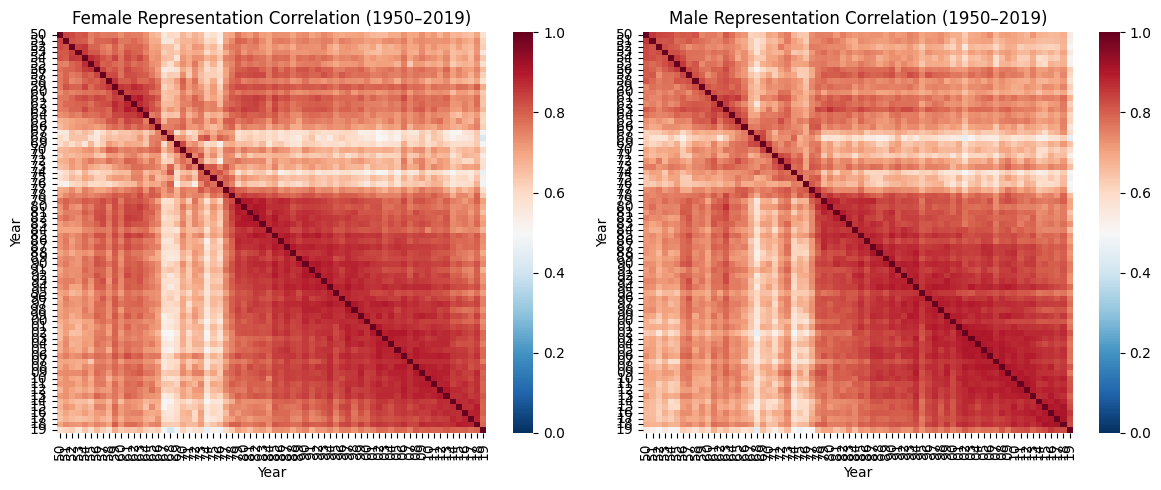


结果已保存至: analysis3_yearly_stability.csv 和 analysis3_temporal_correlation.png


In [11]:
# Analysis 3: Quantifying social change through year-to-year embeddings 通过逐年嵌入量化社会变迁
import os
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
import seaborn as sns

# ======================
# 配置
# ======================
YEARLY_MODEL_DIR = "models_yearly_sg300w3"   
TRAIT_FILE = r"C:/Users/Administrator/Desktop/数据复现数据/trait_cn.txt"
YEARS = list(range(1950, 2020))  # 1950–2019

# 性别标签（确保在各年模型中存在）
FEMALE_LABELS = ["女人", "女性", "她", "妻子", "姑娘", "妇女"]
MALE_LABELS   = ["男人", "男性", "他", "丈夫", "小伙子", "男子"]

# 加载特质词
df_traits = pd.read_csv(TRAIT_FILE, sep=r"\s+", header=None, names=["Word", "Valence"], engine="python")
PERSONALITY_TRAITS = [str(w).strip() for w in df_traits["Word"].tolist()]
print(f"加载 {len(PERSONALITY_TRAITS)} 个人格特质词")

# 黑名单（可选）
BLACKLIST = {"好色", "弱智", "猥琐", "痴呆"}
PERSONALITY_TRAITS = [w for w in PERSONALITY_TRAITS if w not in BLACKLIST]

# ======================
# 工具函数：获取某年某群体的语义关联向量
# ======================
def get_association_vector(model, labels, traits):
    # 多标签聚合：取每个特质与所有标签的平均相似度
    vec = []
    for trait in traits:
        sims = []
        for label in labels:
            if label in model.wv and trait in model.wv:
                sims.append(model.wv.similarity(label, trait))
        avg_sim = np.mean(sims) if sims else np.nan
        vec.append(avg_sim)
    return np.array(vec)

# ======================
# 主流程：加载所有年份的向量
# ======================
female_vectors = {}
male_vectors = {}

for year in YEARS:
    model_path = os.path.join(YEARLY_MODEL_DIR, f"{year}.model")
    if not os.path.exists(model_path):
        print(f"跳过 {year}：模型缺失")
        continue
    
    try:
        model = Word2Vec.load(model_path)
    except Exception as e:
        print(f"跳过 {year}：加载失败 - {e}")
        continue

    # 获取可用标签
    female_avail = [w for w in FEMALE_LABELS if w in model.wv]
    male_avail   = [w for w in MALE_LABELS if w in model.wv]

    if not female_avail or not male_avail:
        print(f"跳过 {year}：性别标签缺失")
        continue

    # 构建向量
    fv = get_association_vector(model, female_avail, PERSONALITY_TRAITS)
    mv = get_association_vector(model, male_avail, PERSONALITY_TRAITS)

    # 检查是否包含有效值
    if np.all(np.isnan(fv)) or np.all(np.isnan(mv)):
        print(f"跳过 {year}：向量全 NaN")
        continue

    female_vectors[year] = fv
    male_vectors[year] = mv

print(f"成功加载 {len(female_vectors)} 年的女性向量，{len(male_vectors)} 年的男性向量")

# ======================
# 计算年-年相关矩阵（女性）
# ======================
years_list = sorted(set(female_vectors.keys()) & set(male_vectors.keys()))
n = len(years_list)
corr_matrix_female = np.full((n, n), np.nan)
corr_matrix_male = np.full((n, n), np.nan)

for i, y1 in enumerate(years_list):
    for j, y2 in enumerate(years_list):
        if i <= j:
            # 女性
            v1, v2 = female_vectors[y1], female_vectors[y2]
            valid = ~(np.isnan(v1) | np.isnan(v2))
            if np.sum(valid) >= 10:  # 至少10个有效维度
                r, _ = pearsonr(v1[valid], v2[valid])
                corr_matrix_female[i, j] = r
                corr_matrix_female[j, i] = r
            
            # 男性
            v1m, v2m = male_vectors[y1], male_vectors[y2]
            valid_m = ~(np.isnan(v1m) | np.isnan(v2m))
            if np.sum(valid_m) >= 10:
                r_m, _ = pearsonr(v1m[valid_m], v2m[valid_m])
                corr_matrix_male[i, j] = r_m
                corr_matrix_male[j, i] = r_m

# ======================
# 分析：相邻年份相关性
# ======================
def compute_lag_correlations(corr_mat, years, max_lag=10):
    lag_corrs = {lag: [] for lag in range(1, max_lag+1)}
    idx_map = {year: i for i, year in enumerate(years)}
    
    for i, y in enumerate(years):
        for lag in range(1, max_lag+1):
            if y + lag in idx_map:
                j = idx_map[y + lag]
                r = corr_mat[i, j]
                if not np.isnan(r):
                    lag_corrs[lag].append(r)
    return {lag: np.mean(vals) for lag, vals in lag_corrs.items() if vals}

lag_female = compute_lag_correlations(corr_matrix_female, years_list, max_lag=10)
lag_male = compute_lag_correlations(corr_matrix_male, years_list, max_lag=10)

print("\n相邻年份平均相关性（女性）:")
for lag in [1, 2, 5, 10]:
    print(f"  Lag {lag}: {lag_female.get(lag, 'N/A'):.3f}")

# ======================
# 特别检查 1966–1976 期间
# ======================
def get_period_avg_corr(corr_mat, years, start, end):
    idx_map = {y: i for i, y in enumerate(years)}
    corrs = []
    for y1 in range(start, end+1):
        for y2 in range(y1+1, end+1):
            if y1 in idx_map and y2 in idx_map:
                r = corr_mat[idx_map[y1], idx_map[y2]]
                if not np.isnan(r):
                    corrs.append(r)
    return np.mean(corrs) if corrs else np.nan

normal_period = get_period_avg_corr(corr_matrix_female, years_list, 1950, 1965)
cultural_revolution = get_period_avg_corr(corr_matrix_female, years_list, 1966, 1976)
post_cr = get_period_avg_corr(corr_matrix_female, years_list, 1977, 1986)

print(f"\n女性表征相关性对比:")
print(f"  1950–1965（正常期）: {normal_period:.3f}")
print(f"  1966–1976（文革）   : {cultural_revolution:.3f}  ← 应显著更低")
print(f"  1977–1986（后文革）: {post_cr:.3f}")

# ======================
# 可视化（热力图）
# ======================
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(corr_matrix_female, 
            xticklabels=[str(y)[-2:] for y in years_list],
            yticklabels=[str(y)[-2:] for y in years_list],
            cmap="RdBu_r", center=0.5, vmin=0, vmax=1)
plt.title("Female Representation Correlation (1950–2019)")
plt.xlabel("Year"); plt.ylabel("Year")

plt.subplot(1, 2, 2)
sns.heatmap(corr_matrix_male, 
            xticklabels=[str(y)[-2:] for y in years_list],
            yticklabels=[str(y)[-2:] for y in years_list],
            cmap="RdBu_r", center=0.5, vmin=0, vmax=1)
plt.title("Male Representation Correlation (1950–2019)")
plt.xlabel("Year"); plt.ylabel("Year")

plt.tight_layout()
plt.savefig("analysis3_temporal_correlation.png", dpi=300, bbox_inches='tight')
plt.show()

# ======================
# 保存结果
# ======================
df_corr = pd.DataFrame({
    "Year": years_list,
    "Lag1_Female": [corr_matrix_female[i, i+1] if i+1 < n else np.nan for i in range(n)],
    "Lag1_Male":   [corr_matrix_male[i, i+1] if i+1 < n else np.nan for i in range(n)]
})
df_corr.to_csv("analysis3_yearly_stability.csv", index=False, encoding="utf-8-sig")

print(f"\n结果已保存至: analysis3_yearly_stability.csv 和 analysis3_temporal_correlation.png")